## 实验

* 单一变量
$$
h_\Theta(x)=\Theta_0+\Theta_1x
$$
* 多变量
$$
h_\Theta(x)=\Theta_0+\sum_{i=1}^{n-1}\Theta_ix_i
$$

### 基于梯度下降的单变量线性回归算法包括梯度的计算与验证(采用数据1)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [16]:
#读取数据
def readData(p):
    data = np.loadtxt(p,dtype=float,delimiter=",")
    return data

In [17]:
#损失函数，返回损失函数计算结果 
def costFuc(theta_0,theta_1,x,y,m):
    h = theta_0+theta_1*x
    return sum((h-y)**2)/(2*m)

**梯度下降算法**
* data:数据
* theta_0（参数θ_0）、theta_1（参数θ_1)
* iterations:迭代次数
* alpha:步长（学习率）

In [22]:
def gradientDescent(data,theta0,theta1,iterations,alpha):
    eachIterationValue = np.zeros((iterations,1))
    x = data[:,0]
    y = data[:,1]
    m =data.shape[0]
    #中间迭代部分
    for i in range(0,iterations):
        #训练过程中的预测值
        h = theta0+theta1*x
        #训练过程中参数变化量
        temp0 = theta0-alpha*((1/m)*sum(h-y))
        temp1 = theta1-alpha*(1/m)*sum((h-y)*x)
        theta0 = temp0
        theta1 = temp1
        #损失函数计算改变值
        costFunction_temp = costFuc(theta0,theta1,x,y,m)
        
        eachIterationValue[i,0] =costFunction_temp
    return theta0,theta1,eachIterationValue

Text(0, 0.5, 'y')

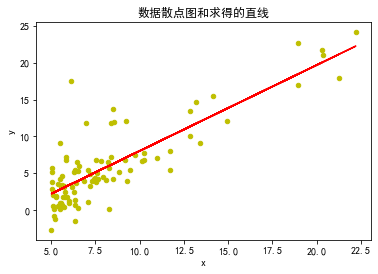

In [28]:
data = readData('ex1data1.txt')
#迭代次数
iterations=1500
#散点图
plt.scatter(data[:,0],data[:,1],color='y',s=20)
#训练之后的数据
theta0,theta1,eachIterationValue =gradientDescent(data,0,0,iterations,0.01)
predictH = theta0+theta1*data[:,0]
plt.plot(data[:,0],predictH,color='r')
plt.title('数据散点图和求得的直线')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'cost函数值')

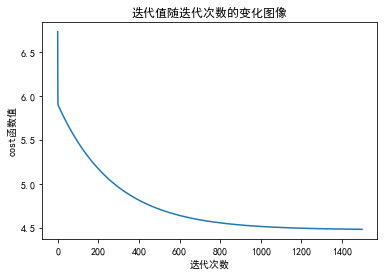

In [29]:
#绘制迭代值随迭代次数的变化图像
plt.plot(np.arange(iterations),eachIterationValue)
plt.title('迭代值随迭代次数的变化图像')
plt.xlabel('迭代次数')
plt.ylabel('cost函数值')

In [44]:
# 基于训练得到的参数，输入新的样本数据，输出预测值
predictH = theta0+theta1*100
print("当x=100时，预测值=",predictH)
predictH = theta0+theta1*1000
print("当x=1000时，预测值=",predictH)

newData = pd.read_csv("data.csv")

当x=100时，预测值= 113.00594359415383
当x=1000时，预测值= 1162.7320588961777


Text(0, 0.5, 'y')

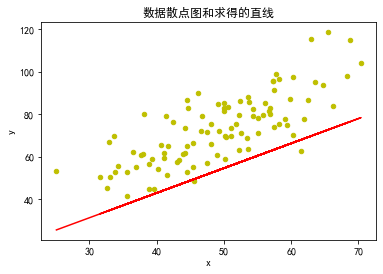

In [48]:
#散点图
plt.scatter(newData.iloc[:,0],newData.iloc[:,1],color='y',s=20)
predictH = theta0+theta1*newData.iloc[:,0]
plt.plot(newData.iloc[:,0],predictH,color='r')
plt.title('输入新的数据，与预测函数进行对别')
plt.xlabel('x')
plt.ylabel('y')

### 基于梯度下降的多变量线性回归算法包括梯度的计算与验证(基于数据2)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [50]:
#读取数据
def readData(path,name=[]):
    data = pd.read_csv(path,names=name) 
    data = (data - data.mean()) / data.std()
    data.insert(0,'First',1)
    return data

In [51]:
#损失函数
def costFunction(x,y,theta):
    inner = np.power(((x * theta.T) - y.T),2)
    return np.sum(inner) / (2 * len(x))

In [52]:
#梯度下降
def gradientDescent(data,theta,alpha,iterations):
    #基于迭代次数建立数组存储每次迭代的结果
    eachIterationValue = np.zeros((iterations,1))
    #参数矩阵
    temp =np.matrix(np.zeros(theta.shape))
    #x y
    X = np.matrix(data.iloc[:,0:-1].values)
    Y = np.matrix(data.iloc[:,-1].values)
    m = X.shape[0]
    colNum=X.shape[1]
    for i in range(iterations):
        error = (X * theta.T)-Y.T
        for j in range(colNum):
            term =np.multiply(error,X[:,j])
            temp[0,j] =theta[0,j]-((alpha/m) * np.sum(term))
        theta =temp
        eachIterationValue[i,0]=costFunction(X,Y,theta)
    return theta,eachIterationValue   

Text(0, 0.5, '损失函数的值')

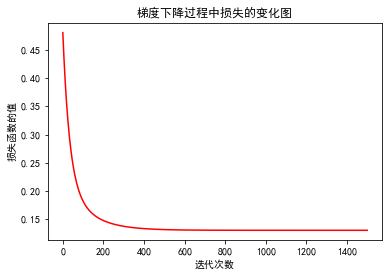

In [62]:
data = readData('ex1data2.txt',['Size', 'Bedrooms', 'Price'])
#data = (data - data.mean()) / data.std()
theta =np.matrix(np.array([0,0,0]))

iterations=1500
alpha =0.01

theta,eachIterationValue=gradientDescent(data,theta,alpha,iterations)

# h = theta[0]+theta[1]*x1+theta[2]*x2
# print(theta[0,1])

In [ ]:
plt.plot(np.arange(iterations),eachIterationValue,color='r')
plt.title('梯度下降过程中损失的变化图')
plt.xlabel('迭代次数')
plt.ylabel('损失函数的值')

In [63]:
# 预测
# 大小=1234 房间数=4
h = theta[0,0]+theta[0,1]*1234+theta[0,2]*4
print(h)

1090.6984379147816


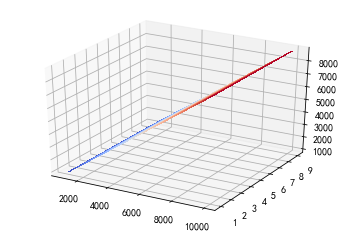

In [67]:
from matplotlib import cm
x = np.arange(1000,10000,1)
y = np.arange(1,10,1)

x,y = np.meshgrid(x, y)
h = theta[0,0]+theta[0,1]*x+theta[0,2]*y

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, h, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)